# Steps

 1. Simple model
 2. Eliminate Features
         2.1 Handle Imbalance Data
 3. Select K Best Features
         3.1 Scale the Features
            3.1.1 Scale & Handle Imbalance
             3.1.2 Different Solvers

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.feature_selection import RFECV
#from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [349]:
def model_performance(log_reg,x_train,y_train,x_test,y_test):
    
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)

    
    
    print("-"*55)
    print(f'Accuracy {accuracy_score(y_test,y_pred)}')
    print("-"*55)
    
    print(classification_report(y_test,y_pred))
    print("-"*55)
    
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix')
    print(cm)
    print("-"*55)
    
    
    TN=cm[0,0]
    TP=cm[1,1]
    FN=cm[1,0]
    FP=cm[0,1]
    sensitivity=TP/float(TP+FN)
    specificity=TN/float(TN+FP)

    print(f'Sensitivity {sensitivity}')
    print(f'Specificity {specificity}')
    print("*"*55)
    
    '''conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
    plt.figure(figsize = (5,3))
    sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="BuPu")'''

In [298]:
heart_df=pd.read_csv("./framingham.csv")
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [299]:
heart_df.shape

(4240, 16)

In [300]:
heart_df.drop(['education'],axis=1,inplace=True)

In [301]:
heart_df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [302]:
heart_df.dropna(axis=0,inplace=True)
data = heart_df.copy()

In [303]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

In [304]:
x = heart_df.iloc[:,:-1]
y = heart_df.iloc[:,-1:]


In [305]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## 1. Simple Model

In [307]:
log_reg=LogisticRegression()
model_performance(log_reg,x_train,y_train,x_test,y_test)

-------------------------------------------------------
Accuracy 0.8588548601864181
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       643
           1       0.75      0.03      0.05       108

   micro avg       0.86      0.86      0.86       751
   macro avg       0.80      0.51      0.49       751
weighted avg       0.84      0.86      0.80       751

-------------------------------------------------------
Confusion Matrix
[[642   1]
 [105   3]]
-------------------------------------------------------
Sensitivity 0.027777777777777776
Specificity 0.9984447900466563
*******************************************************


## 2. Eliminatng features

In [308]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train.values.ravel())

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x_train.columns[rfecv.support_]))

Optimal number of features: 13
Selected features: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


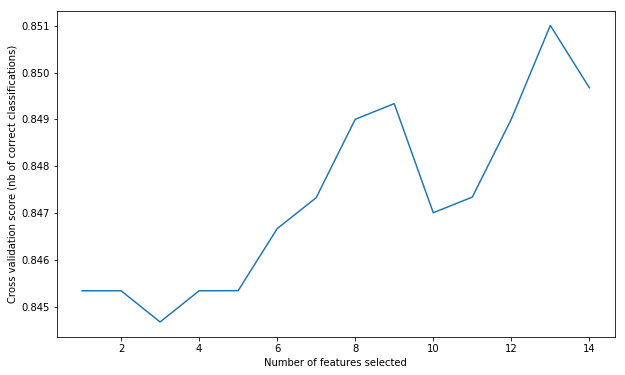

In [309]:
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [310]:
cols=['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'sysBP', 'diaBP', 'heartRate', 'glucose','TenYearCHD']

In [311]:
#['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']
new_features=heart_df[cols]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [312]:
log_reg=LogisticRegression()
model_performance(log_reg,x_train,y_train,x_test,y_test)

-------------------------------------------------------
Accuracy 0.8801597869507324
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.94       659
           1       0.60      0.07      0.12        92

   micro avg       0.88      0.88      0.88       751
   macro avg       0.74      0.53      0.53       751
weighted avg       0.85      0.88      0.84       751

-------------------------------------------------------
Confusion Matrix
[[655   4]
 [ 86   6]]
-------------------------------------------------------
Sensitivity 0.06521739130434782
Specificity 0.9939301972685888
*******************************************************


## 2.1 Handle Imbalance Data

In [313]:

# Shuffle df
shuffled_df = new_features.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

non_CHD_df = new_features.loc[new_features['TenYearCHD']==0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

0    611
1    572
Name: TenYearCHD, dtype: int64

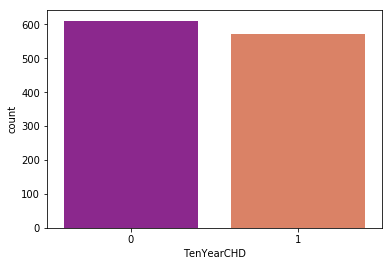

In [314]:
sns.countplot(normalized_df.TenYearCHD, palette="plasma")

In [315]:
y_train = normalized_df['TenYearCHD']
x_train = normalized_df.drop('TenYearCHD', axis=1)

In [316]:
log_reg=LogisticRegression()
model_performance(log_reg,x_train,y_train,x_test,y_test)

-------------------------------------------------------
Accuracy 0.7070572569906791
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       659
           1       0.24      0.62      0.34        92

   micro avg       0.71      0.71      0.71       751
   macro avg       0.58      0.67      0.58       751
weighted avg       0.85      0.71      0.75       751

-------------------------------------------------------
Confusion Matrix
[[474 185]
 [ 35  57]]
-------------------------------------------------------
Sensitivity 0.6195652173913043
Specificity 0.7192716236722306
*******************************************************


In [317]:
classifiers = [LogisticRegression(),SVC(),KNeighborsClassifier(2)]
for classifier in classifiers:
    classifier.fit(x_train, y_train)   
    print("The accuracy score of  is: {0:.2f}%".format((classifier.score(x_test, y_test)*100)))
    print("-"*55)

The accuracy score of  is: 70.71%
-------------------------------------------------------
The accuracy score of  is: 96.14%
-------------------------------------------------------
The accuracy score of  is: 82.56%
-------------------------------------------------------


## 3. Select K best Features

In [318]:
X = heart_df.iloc[:,0:14]  #independent columns
y = heart_df.iloc[:,-1]    #target column i.e price range


In [319]:
# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.109932
13       glucose  402.409837
1            age  297.974980
8        totChol  252.958627
3     cigsPerDay  185.115196
10         diaBP  142.920436
6   prevalentHyp   82.342164
7       diabetes   31.711253
4         BPMeds   26.116583
0           male   19.178560
11           BMI   17.108210


In [320]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,667.109932
13,glucose,402.409837
1,age,297.974980
8,totChol,252.958627
3,cigsPerDay,185.115196
10,diaBP,142.920436
6,prevalentHyp,82.342164
7,diabetes,31.711253
4,BPMeds,26.116583
0,male,19.178560


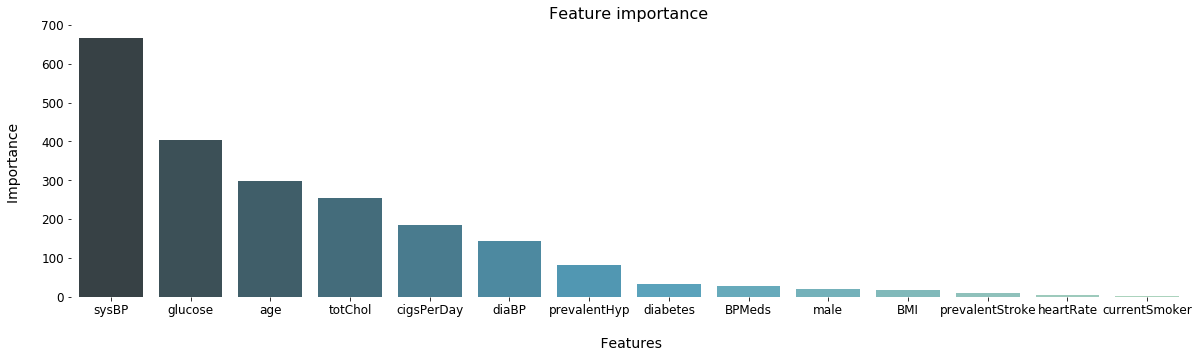

In [321]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [322]:
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male']

In [332]:
df = heart_df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


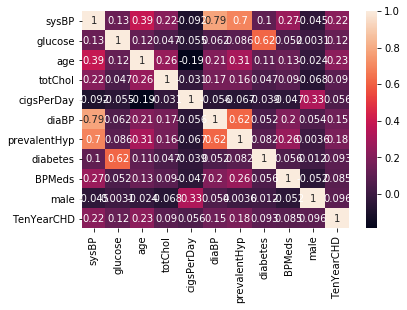

In [333]:
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)
plt.show()
#df_corr

In [334]:
# clarify what is y and what is x label
y = df['TenYearCHD']
X = df.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [335]:
log_reg=LogisticRegression()
model_performance(log_reg,x_train,y_train,y_test)

-------------------------------------------------------
Accuracy 0.8402130492676432
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       625
           1       1.00      0.05      0.09       126

   micro avg       0.84      0.84      0.84       751
   macro avg       0.92      0.52      0.50       751
weighted avg       0.87      0.84      0.77       751

-------------------------------------------------------
Confusion Matrix
[[625   0]
 [120   6]]
-------------------------------------------------------
Sensitivity 0.047619047619047616
Specificity 1.0
*******************************************************


## 3.1 Scale the Features

In [342]:
scaler = MinMaxScaler(feature_range=(0,1)) 

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [343]:
# clarify what is y and what is x label
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [344]:
log_reg=LogisticRegression()
model_performance(log_reg,x_train,y_train,x_test,y_test)

-------------------------------------------------------
Accuracy 0.8402130492676432
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       625
         1.0       1.00      0.05      0.09       126

   micro avg       0.84      0.84      0.84       751
   macro avg       0.92      0.52      0.50       751
weighted avg       0.87      0.84      0.77       751

-------------------------------------------------------
Confusion Matrix
[[625   0]
 [120   6]]
-------------------------------------------------------
Sensitivity 0.047619047619047616
Specificity 1.0
*******************************************************


## 3.1.1 Scale & Handle Imbalance

In [345]:
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

0.0    611
1.0    572
Name: TenYearCHD, dtype: int64

In [346]:
y_train = normalized_df['TenYearCHD']
x_train = normalized_df.drop('TenYearCHD', axis=1)

In [347]:
log_reg=LogisticRegression()
model_performance(log_reg,x_train,y_train,y_test)

-------------------------------------------------------
Accuracy 0.6870838881491345
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.79       625
         1.0       0.30      0.67      0.42       126

   micro avg       0.69      0.69      0.69       751
   macro avg       0.61      0.68      0.60       751
weighted avg       0.81      0.69      0.72       751

-------------------------------------------------------
Confusion Matrix
[[432 193]
 [ 42  84]]
-------------------------------------------------------
Sensitivity 0.6666666666666666
Specificity 0.6912
*******************************************************


## 3.1.2 Try Different Solvers

In [350]:
solvers=['newton-cg','lbfgs','liblinear','sag','saga']
for s in solvers:
    print()
    print(f"+++++++++ Solver {s} +++++++++")
    log_reg=LogisticRegression(solver=s)
    model_performance(log_reg,x_train,y_train,x_test,y_test)


+++++++++ Solver newton-cg +++++++++
-------------------------------------------------------
Accuracy 0.6857523302263648
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.79       625
         1.0       0.30      0.65      0.41       126

   micro avg       0.69      0.69      0.69       751
   macro avg       0.60      0.67      0.60       751
weighted avg       0.81      0.69      0.72       751

-------------------------------------------------------
Confusion Matrix
[[433 192]
 [ 44  82]]
-------------------------------------------------------
Sensitivity 0.6507936507936508
Specificity 0.6928
*******************************************************

+++++++++ Solver lbfgs +++++++++
-------------------------------------------------------
Accuracy 0.6857523302263648
-------------------------------------------------------
              precision    recall  f1-score   support

        

Ref:<br>
https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression <br>
https://www.kaggle.com/minnieliang/heart-disease-prediction-logistic-regression <br>
https://www.kaggle.com/lauriandwu/machine-learning-heart-disease-framingham